<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/class-activity/synthetic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [5]:
df = pd.read_csv('synthetic_dataset.csv')
# df.head()
df.insert(0,"x0",[1 for i in range(50)])
df.head

<Axes: xlabel='x1', ylabel='x2'>

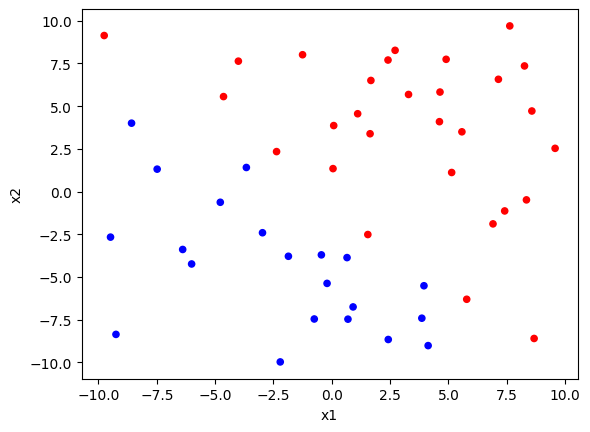

In [6]:
df["color"] = np.where(df["y"]==1, "red", "blue")
df.plot.scatter(x="x1", y="x2", color=df["color"])

In [7]:
def sign(x):
  if(x>=0):
    return 1
  else:
    return -1

In [8]:
def get_sign(x, w):
  dot_product = (x[0]*w[0] + x[1]*w[1] + x[2]*w[2])
  return sign(dot_product)

In [9]:
df_y = df["y"]
classified_h = []
misclassified = {}

def check_for_misclassified(w):
  misclassified = {}
  for i in range (df.shape[0]):
    classified_h.append(get_sign(df.iloc[i],w))
    if(classified_h[i]!=df_y[i]):
        misclassified[i] = classified_h[i]

  print(classified_h)
  print(misclassified)

In [5]:

def perceptron():
  w = [0,1,1]
  check_for_misclassified(w)
  while(misclassified.len()!=0):
    list_of_misclass = list(misclassified.keys())[0]
    x0 = df.iloc[list_of_misclass][0]
    x1 = df.iloc[list_of_misclass][1]
    x2 = df.iloc[list_of_misclass][2]
    print("misclass",list_of_misclass)
    # y = df_y[]
    print("misclassified point:",x1,x2)
    w = w + [x0,x1,x2]*y
    print("new w:",w)
    check_for_misclassified(w)


In [6]:
perceptron()

NameError: ignored

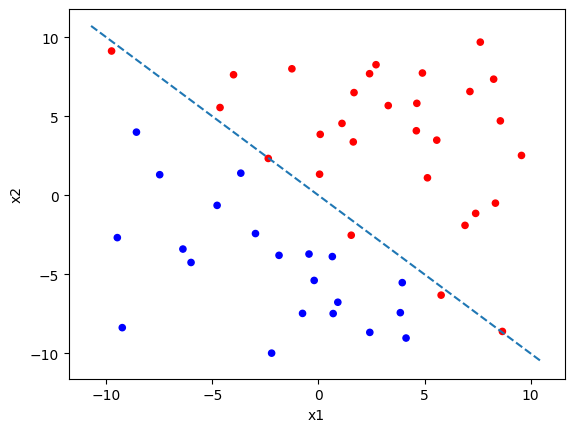

In [14]:
col = df['y'].map({-1:'b', 1:'r'})
df.plot.scatter(x='x1', y='x2', c=col)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
plt.plot(x_vals, y_vals, '--')